Most of this activity is taken from: 
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('./adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [ ]:
print('Males', data[data['sex'] == 'Male']['sex'].count())
print('Females', data[data['sex'] == 'Female']['sex'].count())

Males 21790
Females 10771


**2. What is the average age (*age* feature) of women?**

In [15]:
print('Females', data[data['sex'] == 'Female']['age'].mean())

Females 36.85823043357163


**3. What is the percentage of German citizens (*native-country* feature)?**

In [16]:
print('Percentage of german citizens', data[data['native-country'] == 'Germany']['native-country'].count() / data['native-country'].count())

Percentage of german citizens 0.004207487485028101


4-5. __What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?__

In [33]:
print('Mean age of those who earn more than 50K', data[data['salary'] == '>50K']['age'].mean())

Mean age of those who earn more than 50K 44.24984058155847


In [32]:
print('Mean age of those who earn less than 50K', data[data['salary'] == '<=50K']['age'].mean())

Mean age of those who earn less than 50K 36.78373786407767


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [34]:
print(data[data['salary'] == '>50K']['education'].value_counts())
print('FALSO')

education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: count, dtype: int64
FALSO


**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [ ]:
print(data.groupby('race').describe())
print(data.groupby('sex').describe())
print(82)

                        age                                                \
                      count       mean        std   min   25%   50%   75%   
race                                                                        
Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  28.0  35.0  45.5   
Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  28.0  36.0  45.0   
Black                3124.0  37.767926  12.759290  17.0  28.0  36.0  46.0   
Other                 271.0  33.457565  11.538865  17.0  25.0  31.0  41.0   
White               27816.0  38.769881  13.782306  17.0  28.0  37.0  48.0   

                           fnlwgt                                         \
                     max    count           mean            std      min   
race                                                                       
Amer-Indian-Eskimo  82.0    311.0  120831.147910   88338.636336  12285.0   
Asian-Pac-Islander  90.0   1039.0  159940.609240   85122.307505  14878.0   
Bla

**8. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [29]:
print(data['hours-per-week'].max())
print(data[data['hours-per-week'] == 99]['hours-per-week'].count())

print((data[(data['hours-per-week'] == 99) & (data['salary'] == '>50K')]['hours-per-week'].count()) / data[data['hours-per-week'] == 99]['hours-per-week'].count())

99
85
0.29411764705882354


**9. Find the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [31]:
# mean time of work per country per salary
print(data.groupby(['native-country', 'salary'])['hours-per-week'].mean())
# Japan
print(data[(data['native-country'] == 'Japan') & (data['salary'] == '>50K')]['hours-per-week'].mean())
print(data[(data['native-country'] == 'Japan') & (data['salary'] == '<=50K')]['hours-per-week'].mean())



native-country  salary
?               <=50K     40.164760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 82, dtype: float64
47.958333333333336
41.0


__10. Create 2 visualizations (what to plot is up to you) and write the conclusions generated with those plots from the dataset__ 

Text(0.5, 1.0, 'Distribution of people with salary >50K')

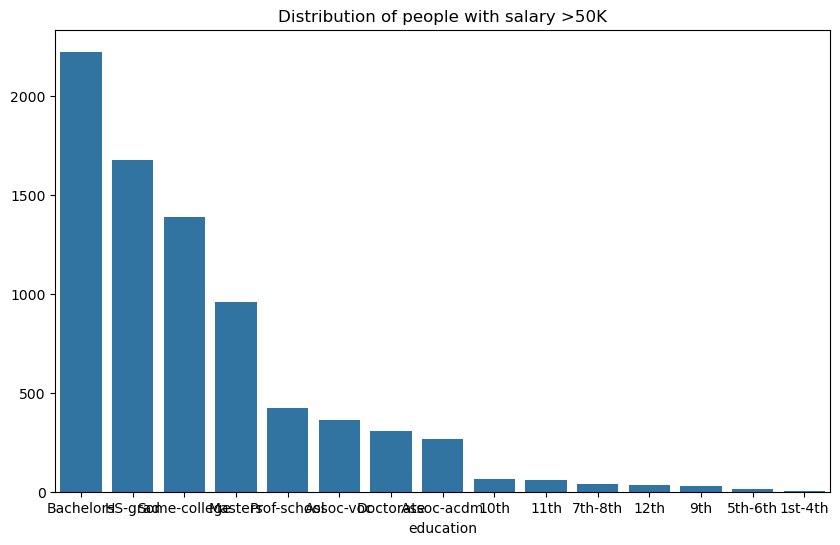

In [35]:
education = data[data['salary'] == '>50K']['education'].value_counts()
# plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=education.index, y=education.values)
plt.title('Distribution of people with salary >50K')


Text(0.5, 1.0, 'Distribution of people who work 99 hours per week')

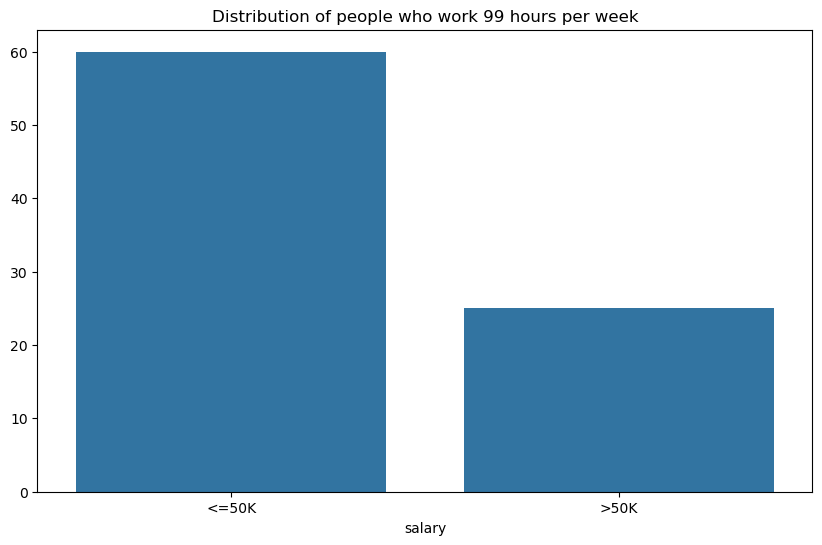

In [ ]:
#plot of salary of those who work the most hours
hours = data[data['hours-per-week'] == 99]['salary'].value_counts()
# plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=hours.index, y=hours.values)
plt.title('Distribution of people who work 99 hours per week')




In [38]:
conclusion = """As we can see, the most of the people who earn more than 50K have a degree of Bachelors or higher. Theres no correlation
between the hours worked and the salary, as the people who work the most hours are not the ones who earn more than 50K.f"""
print(conclusion)

As we can see, the most of the people who earn more than 50K have a degree of Bachelors or higher. Theres no correlation
between the hours worked and the salary, as the people who work the most hours are not the ones who earn more than 50K.f
